<a id="1"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">A. IMPORT DEPENDENCIES</div>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import streamlit as st

import nltk
import re
import string
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

In [3]:
df0 = pd.read_csv('D:\Mehedi Azad\Streamlit\streamlit components\multipage\datasets\Coffee_Shop_Sales.xlsx - Transactions.csv')
df = df0.copy()
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


<a id="2"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">DATASET OVERVIEW</div>

In [33]:
# shape of the dataset
df.shape

(149116, 11)

In [34]:
columns = df.columns
columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [36]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [37]:
df.describe(include='object')

,transaction_date,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116,149116
unique,181,25762,3,9,29,80
top,6/19/2023,9:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,1343,41,50735,58416,17183,3076


In [38]:
# checking numerical and categorical features
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cal_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print('Numerical Columns: ', num_cols)
print('Categorical Columns: ',cal_cols)

Numerical Columns:  ['transaction_id', 'transaction_qty', 'store_id', 'product_id', 'unit_price']
Categorical Columns:  ['transaction_date', 'transaction_time', 'store_location', 'product_category', 'product_type', 'product_detail']


In [39]:
df[df.columns].nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64

<a id="2"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">DATA CLEANING & PREPROCESSING</div>

In [40]:
# CHECKING DUPLICATE VALUES
df.duplicated().sum().sum()

0

In [41]:
print('Total Missing values: ', df.isna().sum().sum())
df.isna().sum()

Total Missing values:  0


transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

OBSERVATIONS:
- No Missing values

In [42]:
def unique_summary(df):
    data = {
        'Column': [],
        'Unique Count': [],
        'Unique Values': []
    }
    
    for col in df.columns:
        unique_vals = df[col].unique()
        data['Column'].append(col)
        data['Unique Count'].append(len(unique_vals))
        data['Unique Values'].append(unique_vals)
    
    return pd.DataFrame(data)

unique_values_df = unique_summary(df)
display(unique_values_df)

,Column,Unique Count,Unique Values
0,transaction_id,149116,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,transaction_date,181,"[1/1/2023, 1/2/2023, 1/3/2023, 1/4/2023, 1/5/2..."
2,transaction_time,25762,"[7:06:11, 7:08:56, 7:14:04, 7:20:24, 7:22:41, ..."
3,transaction_qty,6,"[2, 1, 3, 4, 8, 6]"
4,store_id,3,"[5, 8, 3]"
5,store_location,3,"[Lower Manhattan, Hell's Kitchen, Astoria]"
6,product_id,80,"[32, 57, 59, 22, 77, 28, 39, 58, 56, 33, 51, 8..."
7,unit_price,41,"[3.0, 3.1, 4.5, 2.0, 4.25, 3.5, 2.55, 3.75, 2...."
8,product_category,9,"[Coffee, Tea, Drinking Chocolate, Bakery, Flav..."
9,product_type,29,"[Gourmet brewed coffee, Brewed Chai tea, Hot c..."


# `transaction_date` & `transaction_time` column modification

In [43]:
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'])

# Display the new column
print(df[['transaction_date', 'transaction_time', 'transaction_datetime']].head())



  transaction_date transaction_time transaction_datetime
0         1/1/2023          7:06:11  2023-01-01 07:06:11
1         1/1/2023          7:08:56  2023-01-01 07:08:56
2         1/1/2023          7:14:04  2023-01-01 07:14:04
3         1/1/2023          7:20:24  2023-01-01 07:20:24
4         1/1/2023          7:22:41  2023-01-01 07:22:41


In [44]:
# Extrating year, month day, hour & minute column
df['year'] = df['transaction_datetime'].dt.year
df['month'] = df['transaction_datetime'].dt.month
df['day'] = df['transaction_datetime'].dt.day
df['hour'] = df['transaction_datetime'].dt.hour
df['minute'] = df['transaction_datetime'].dt.minute

# Display extracted parts
print(df[['transaction_datetime', 'year', 'month', 'day', 'hour', 'minute']].sample(10))

       transaction_datetime  year  month  day  hour  minute
92234   2023-05-12 08:39:06  2023      5   12     8      39
19105   2023-02-04 10:02:45  2023      2    4    10       2
89200   2023-05-09 10:25:34  2023      5    9    10      25
114429  2023-06-01 15:12:22  2023      6    1    15      12
30071   2023-02-22 16:48:24  2023      2   22    16      48
37503   2023-03-06 17:22:34  2023      3    6    17      22
130248  2023-06-15 07:29:41  2023      6   15     7      29
92286   2023-05-12 09:05:26  2023      5   12     9       5
29332   2023-02-21 10:39:03  2023      2   21    10      39
132679  2023-06-16 19:59:51  2023      6   16    19      59


### Droping Unnecessary Columns 
# Droping `transaction_id`, `transaction_date`, `transaction_time` columns

In [45]:
df.drop(['transaction_datetime', 'transaction_id', 'transaction_date', 'transaction_time'], axis=1, inplace=True)

In [46]:
df.head()

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute
0,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6
1,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,8
2,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,1,1,7,14
3,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,1,1,7,20
4,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,22


# Creating `Sweet Report`

                                             |          | [  0%]   00:00 -> (? left)


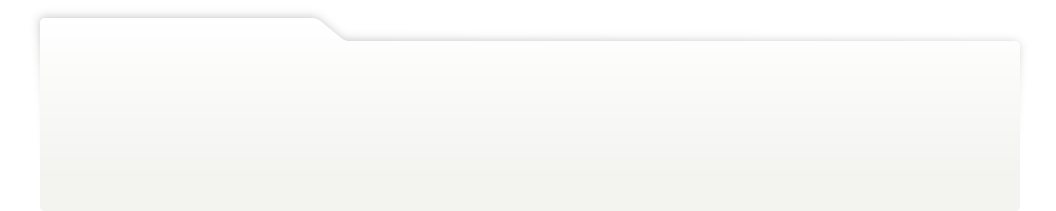
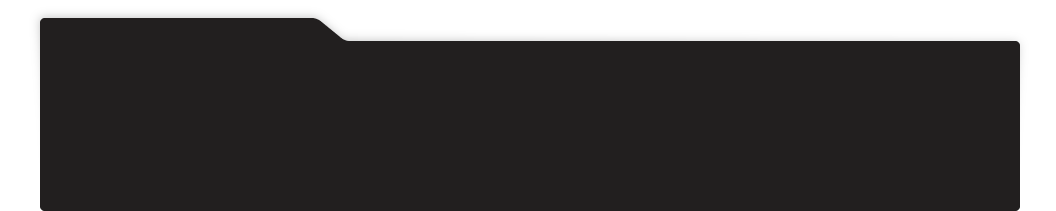
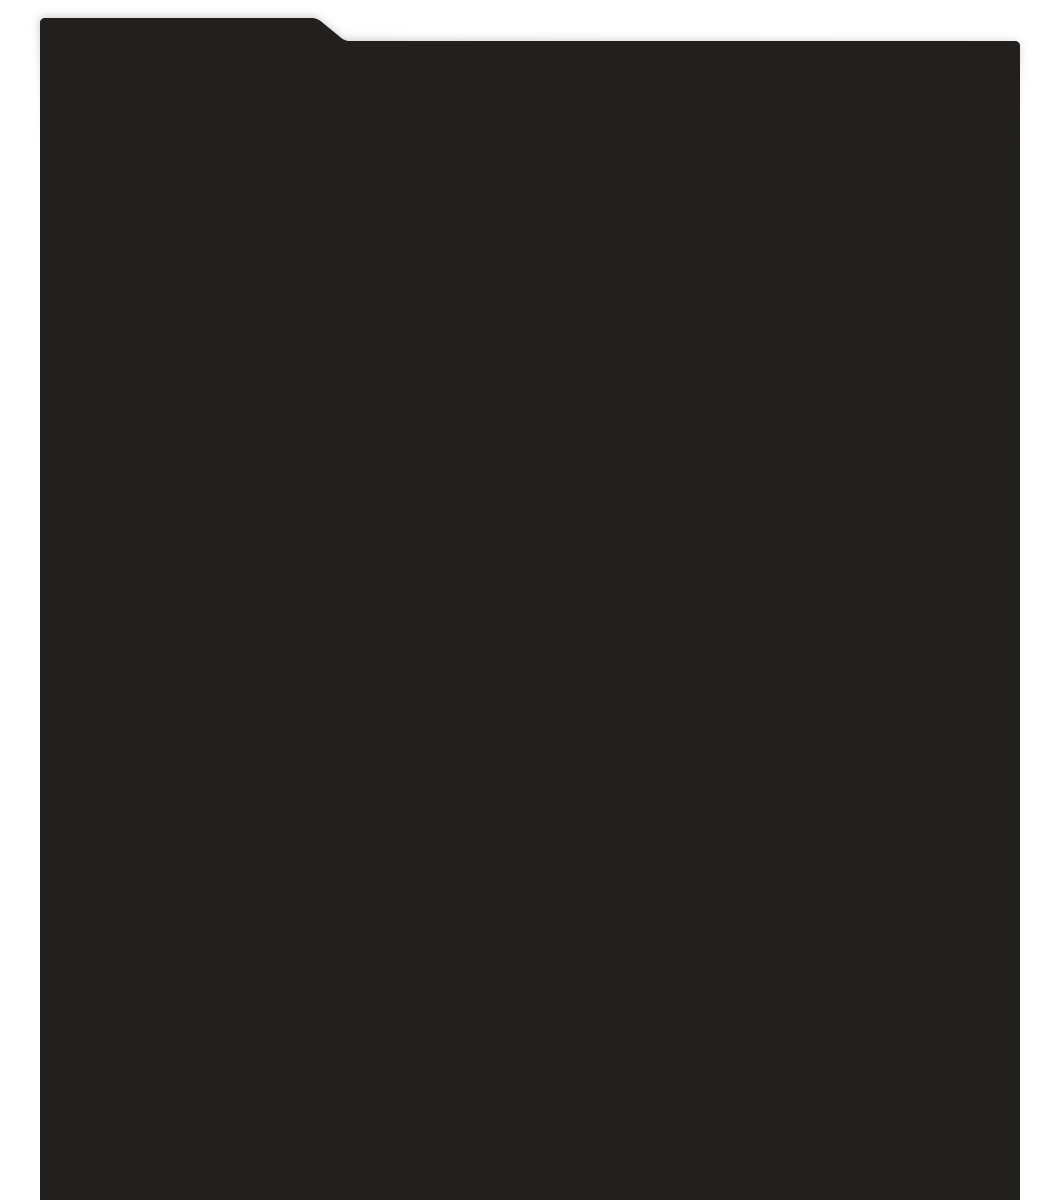
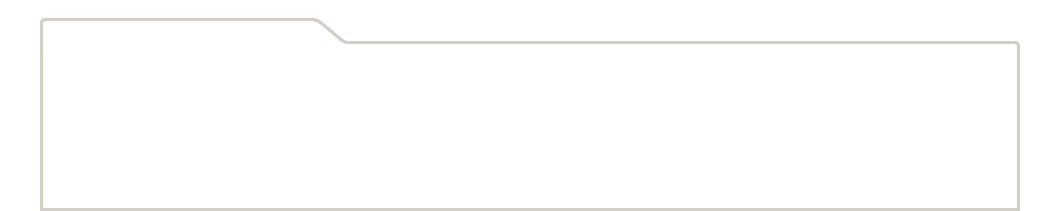
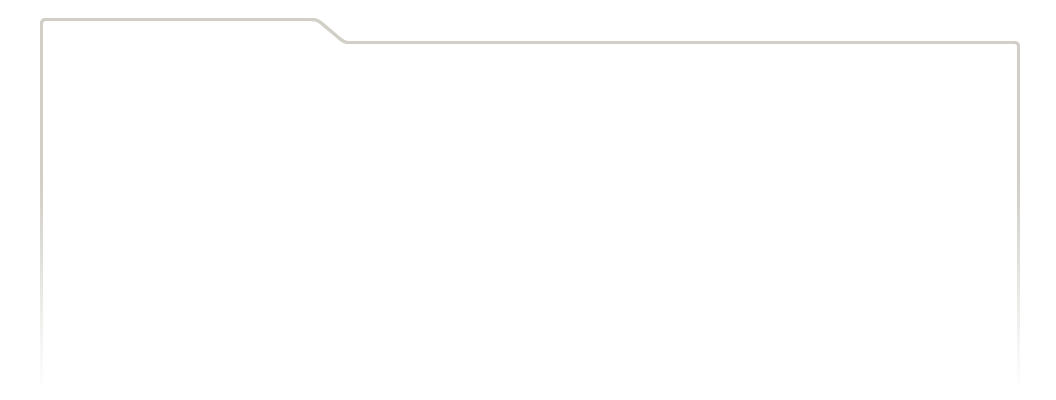
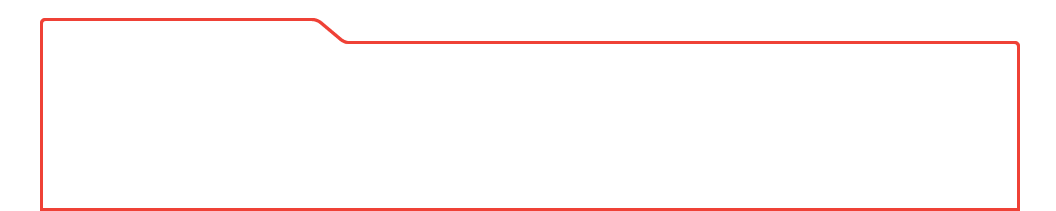
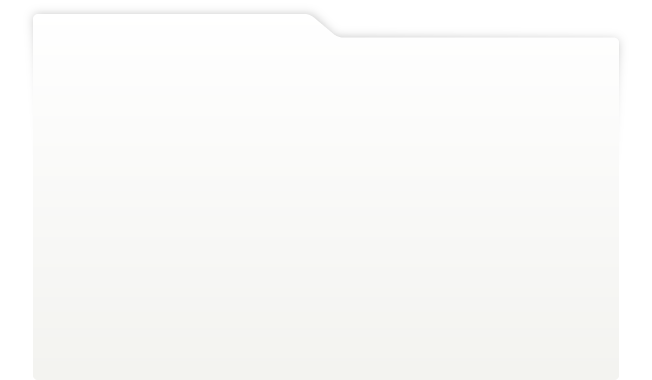
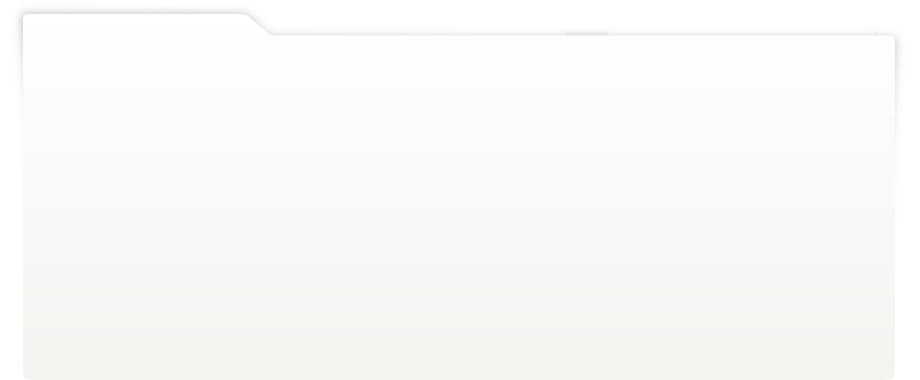
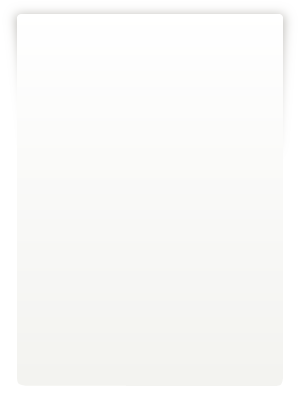
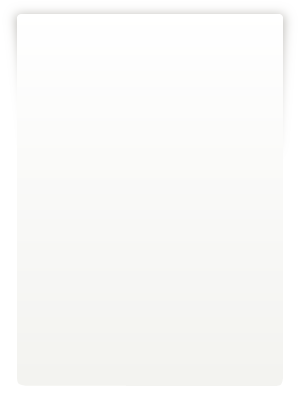
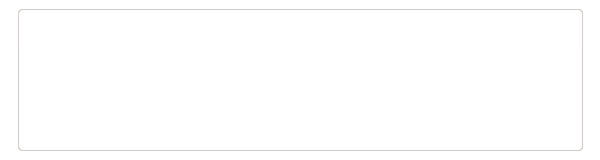
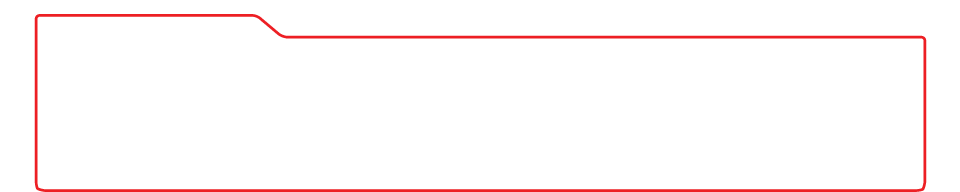
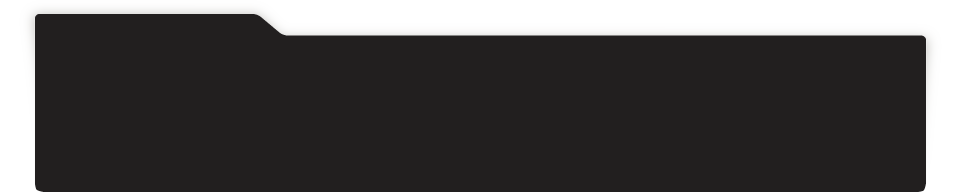
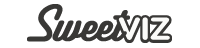
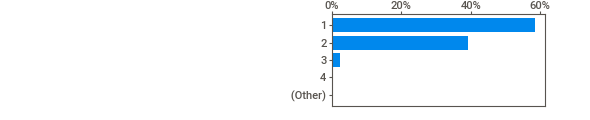
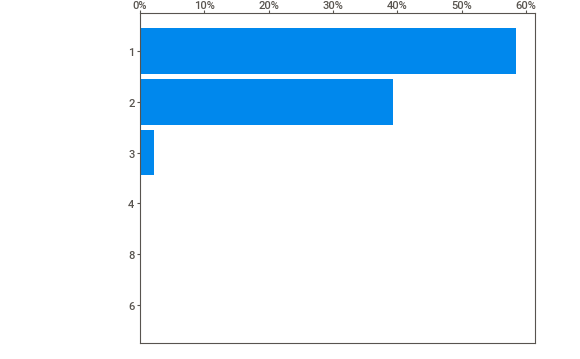
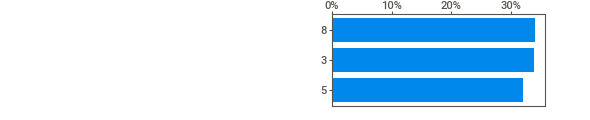
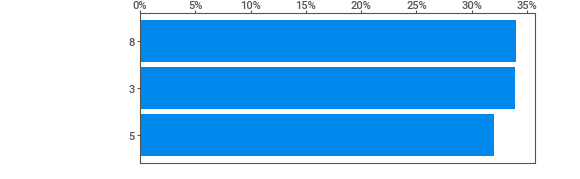
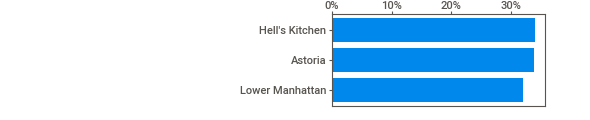
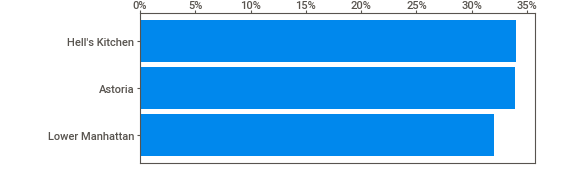
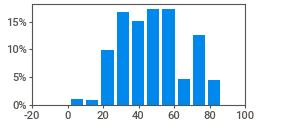
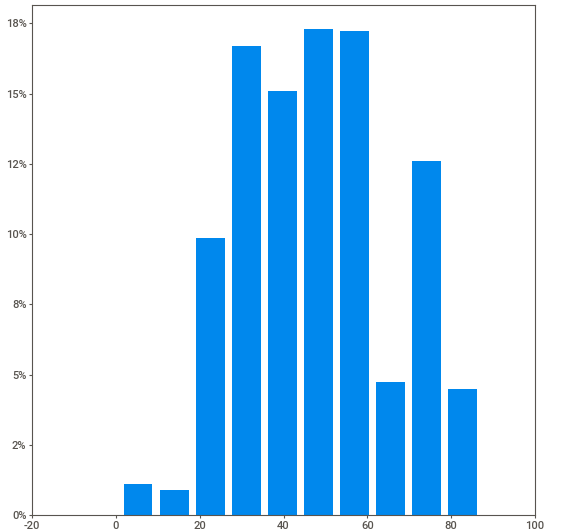
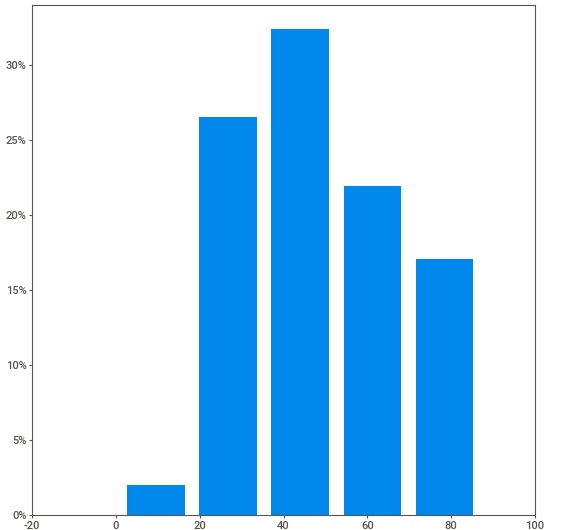
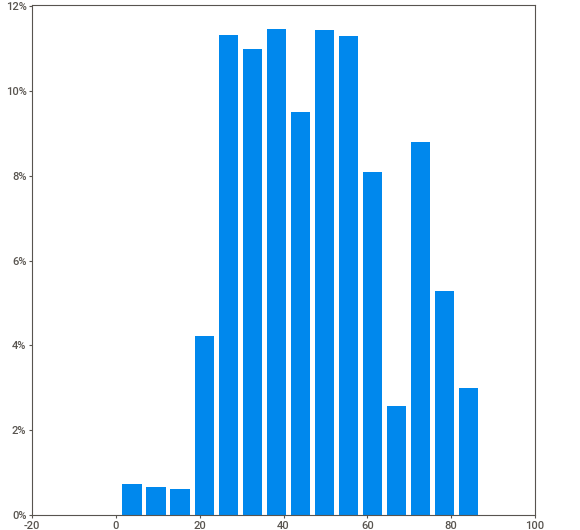
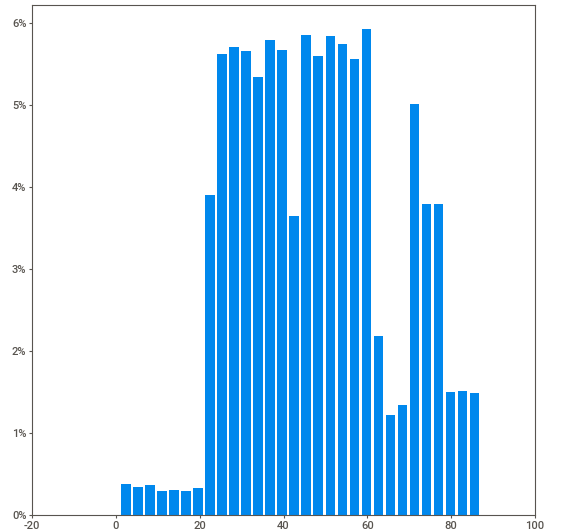
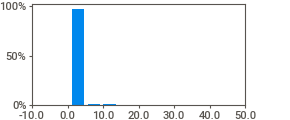
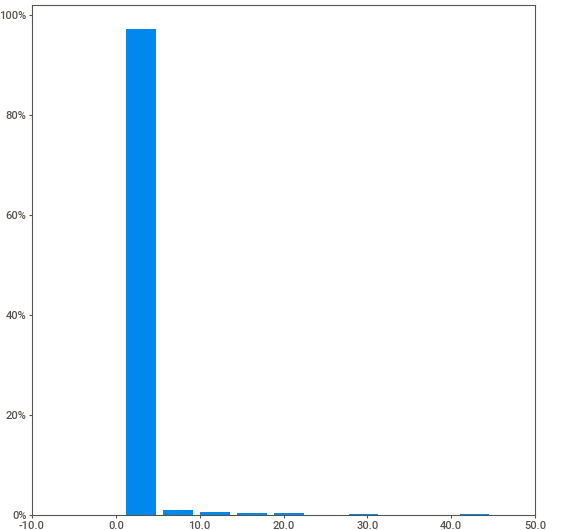
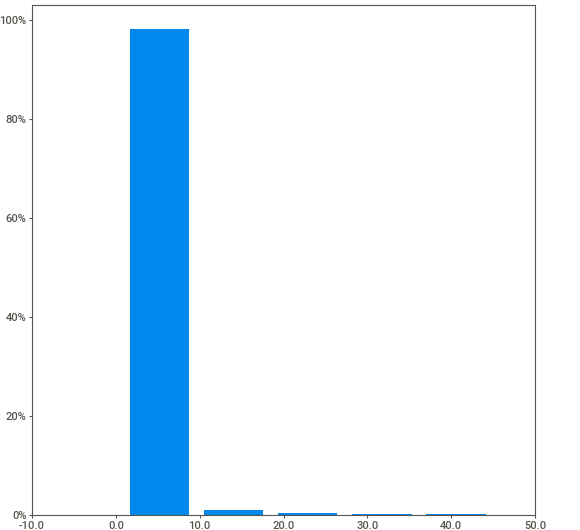
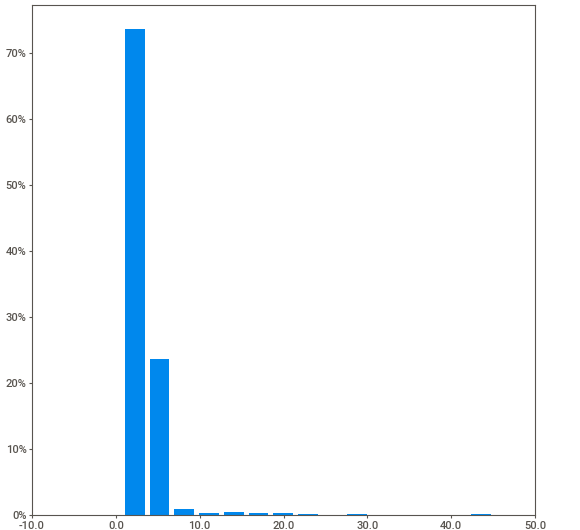
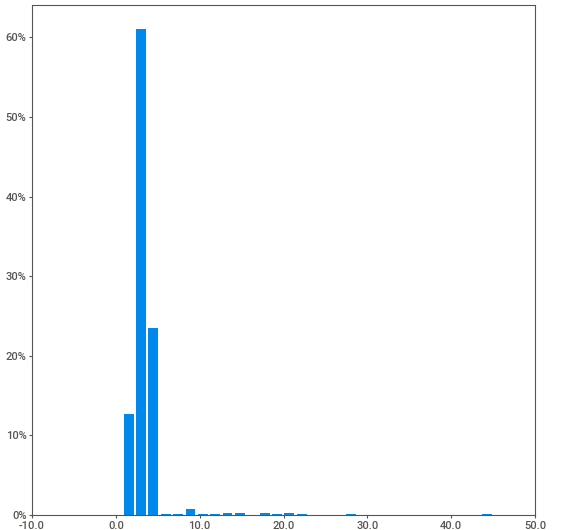
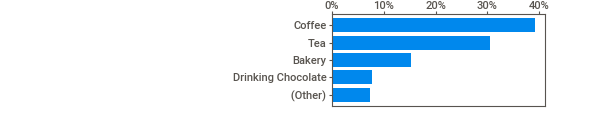
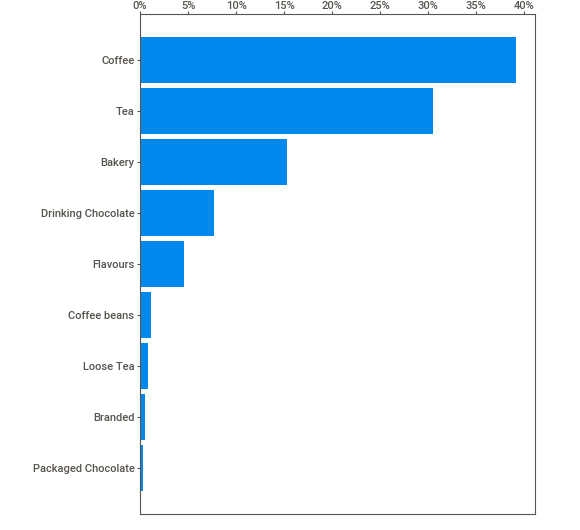
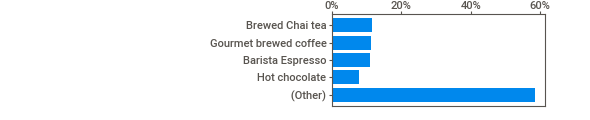
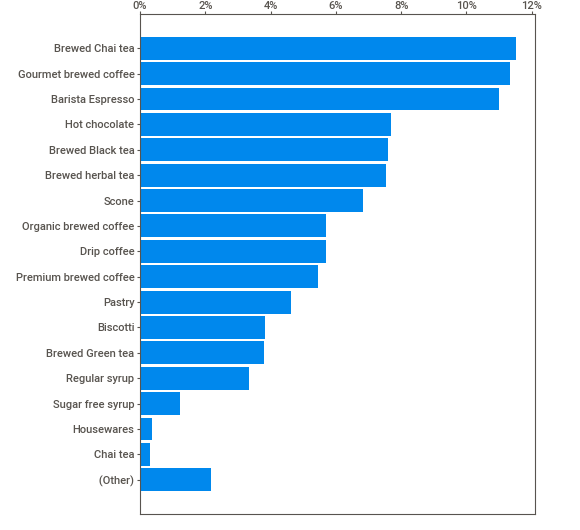
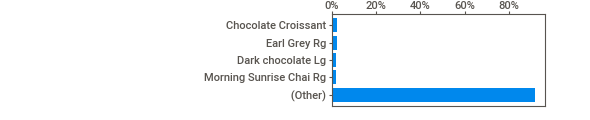
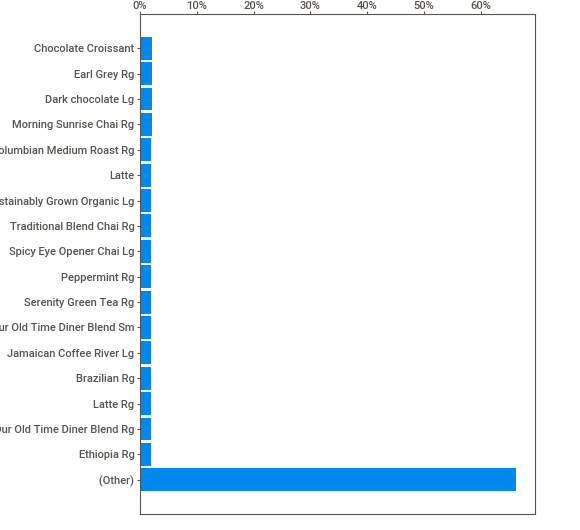
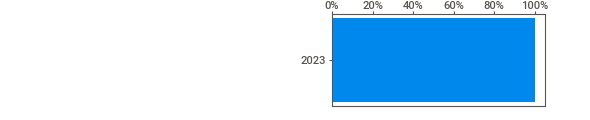
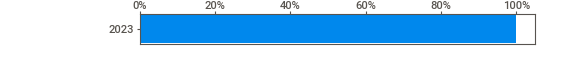
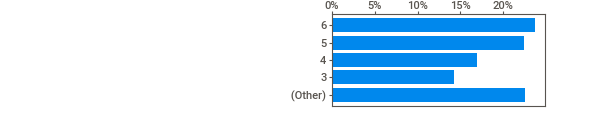
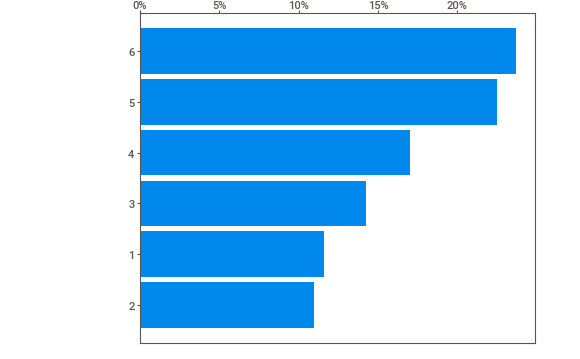
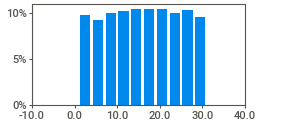
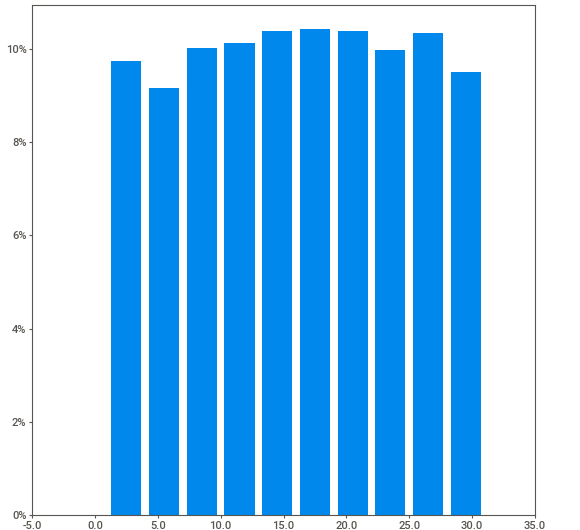
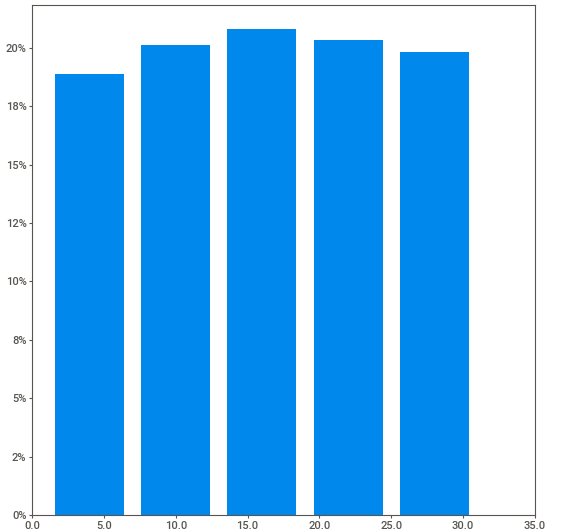
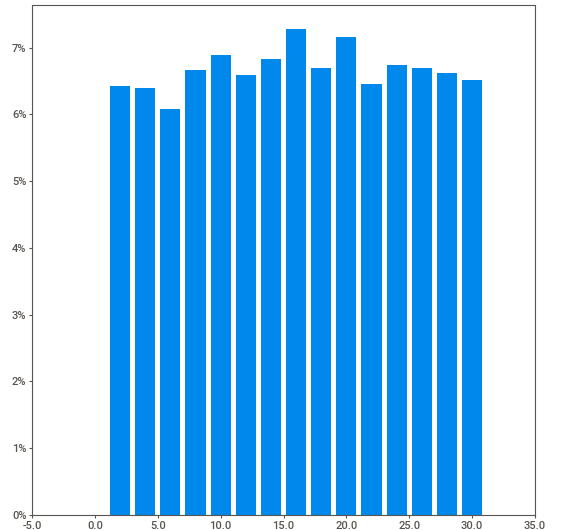
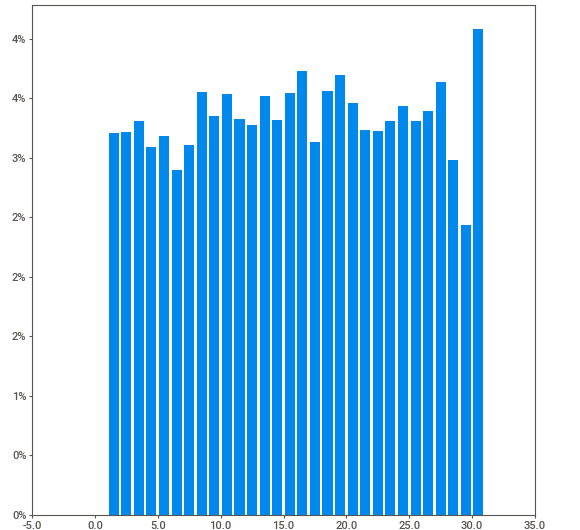
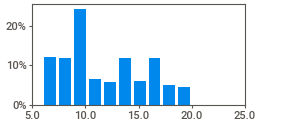
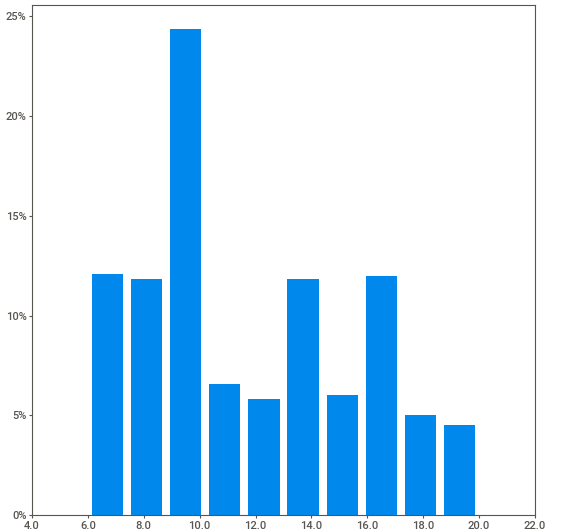
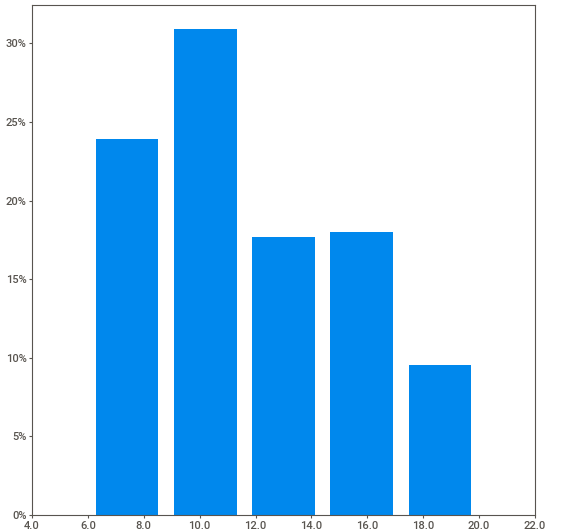
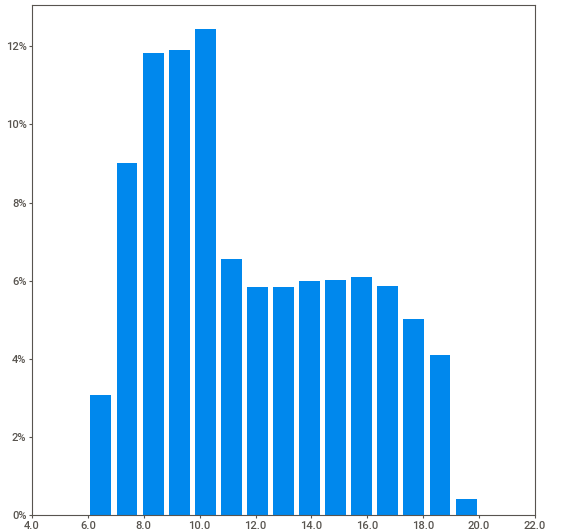
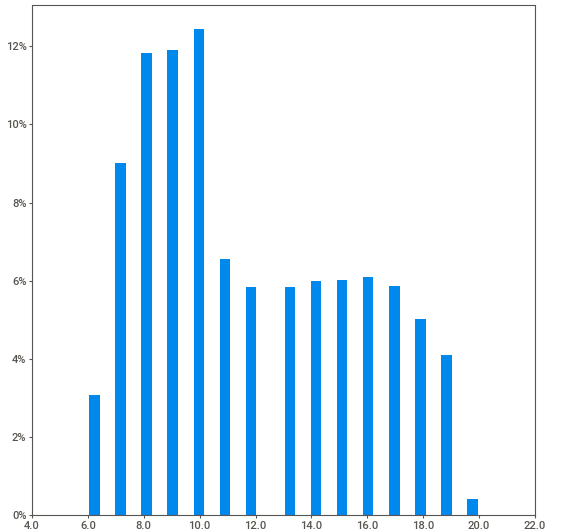
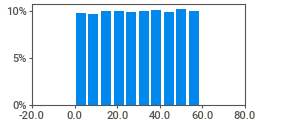
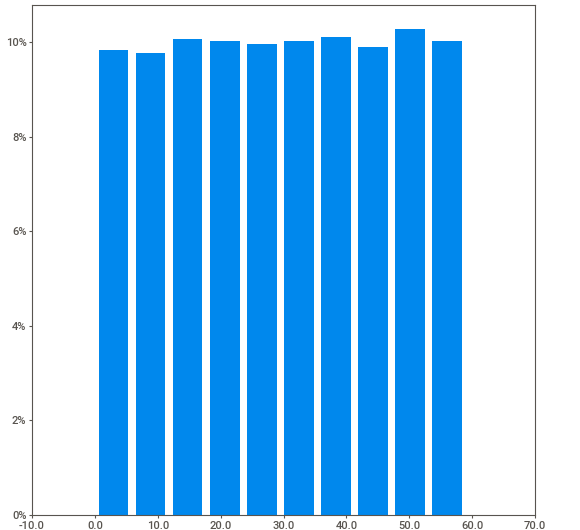
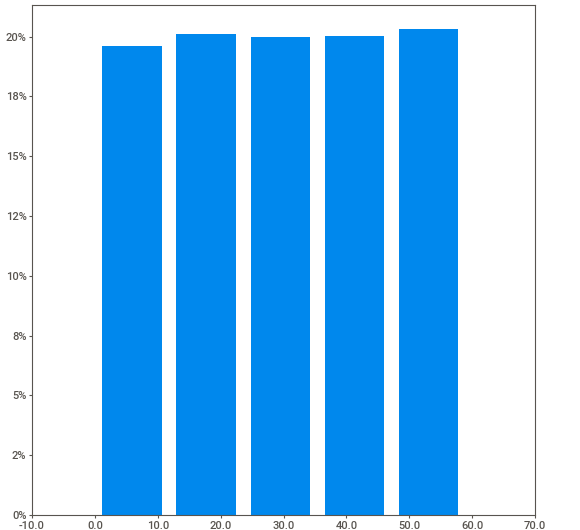
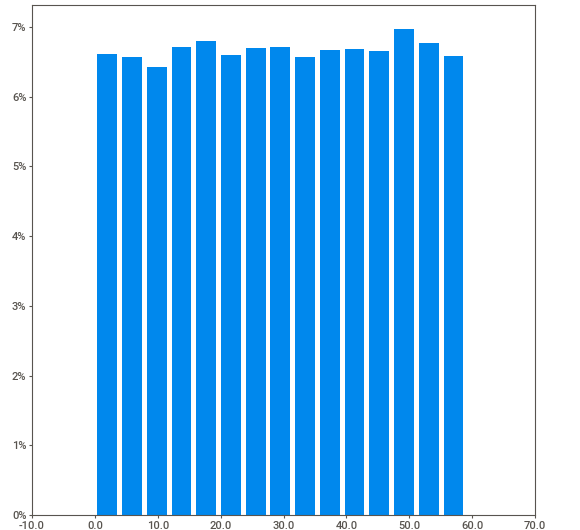
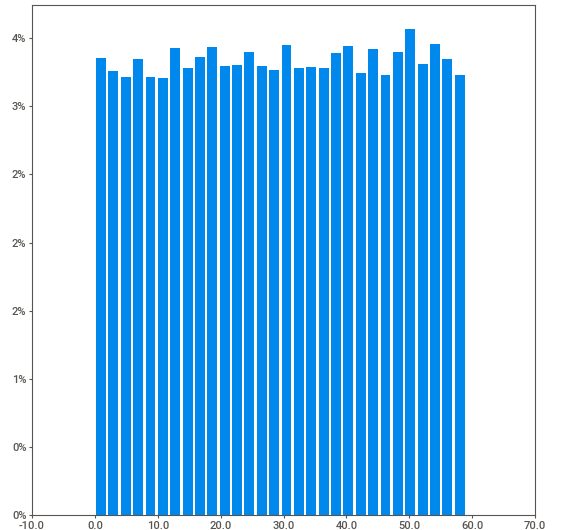
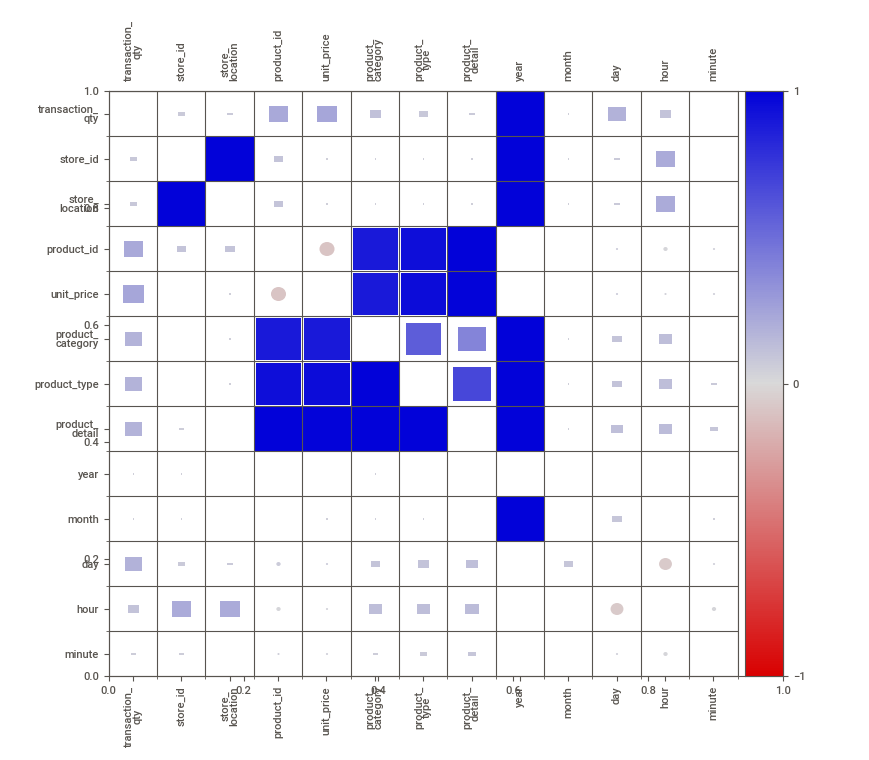
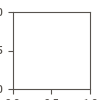

In [47]:
sweet_report = sv.analyze(df)
sweet_report.show_notebook(layout='widescreen', w=1500, h=600, scale=0.8)

<a id="2"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">FUNCTION FOR UNIVARIATE ANALYSIS</div>

In [48]:


def univariate_ploting(df, variable):
    # Check if the variable exists in the dataframe
    if variable not in df.columns:
        print(f"Column '{variable}' not found in the DataFrame.")
        return
    
    # Display unique values and their count
    unique_values = df[variable].unique()
    unique_count = df[variable].nunique()
    total_count = df[variable].value_counts().sum()
    value_counts = df[variable].value_counts()
    
    
    # Display the variable information
    print(f"Unique values in '{variable}': {unique_values}")
    print(f"Total unique values in '{variable}': {unique_count}")
    print(f"Total value counts for '{variable}':{total_count}")
    print(f"Value counts for '{variable}':{value_counts}")
    
    # Prepare data for plot
    value_counts_df = value_counts.reset_index()
    value_counts_df.columns = [variable, 'count']

    # Create a bar chart with counts displayed above each bar
    fig = px.bar(value_counts_df, 
                 x=variable, y='count', color=variable,
                 labels={variable: f'{variable} Categories', 'count': f'Count of Transactions : {variable}'},
                 text='count',  # Add count text on top of bars
                 template='plotly_dark'
    )

    # Update the layout with title and styling
    fig.update_layout(
        title=f"<b>Distribution of {variable}</b>",
        titlefont={'color': None, 'size': 25, 'family': 'Times New Roman'},
        height=600, 
        width=1200,
        title_x=0.5,
    )

    # Automatically display text values on bars
    fig.update_traces(textposition='outside')  # Set position of text to be outside the bars

    # Show the plot
    fig.show()

# univariate_ploting(df, 'product_category')

# working with `month` column

In [49]:
univariate_ploting(df, 'month')

Unique values in 'month': [1 2 3 4 5 6]
Total unique values in 'month': 6
Total value counts for 'month':149116
Value counts for 'month':6    35352
5    33527
4    25335
3    21229
1    17314
2    16359
Name: month, dtype: int64


# `Observations` of `month` column:
- Total unique values : 6
- The `Unique values` in are: [1 2 3 4 5 6]
- `Maximum`(35352) & `minimum`(16359) count occure in `6th` & `2nd` month repectively.
- `Second`(33527) & `Third positions`(25335) belogs to `5th` & `4th` month.
- Mean value : 3.9889
- Standard Deviation : 1.6731
- Minimum value : 1
- Maximum value : 6

# working with `hour` column

In [50]:
univariate_ploting(df, 'hour')

Unique values in 'hour': [ 7  8  9 10 11 12 13 14 15 16 17 18 19  6 20]
Total unique values in 'hour': 15
Total value counts for 'hour':149116
Value counts for 'hour':10    18545
9     17764
8     17654
7     13428
11     9766
16     9093
15     8979
14     8933
17     8745
13     8714
12     8708
18     7498
19     6092
6      4594
20      603
Name: hour, dtype: int64


# `Observations` of `hour` column:
- Total unique values : 15
- Unique values : [ 7 8 9 10 11 12 13 14 15 16 17 18 19 6 20]
- Mean value : 3.9889
- Standard Deviation : 11.7158
- Minimum value : 6
- Maximum value : 20


# working with `day` column

In [51]:
univariate_ploting(df, 'day')

Unique values in 'day': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Total unique values in 'day': 31
Total value counts for 'day':149116
Value counts for 'day':16    5563
19    5511
27    5420
18    5305
8     5291
15    5282
10    5273
13    5247
20    5163
24    5120
26    5057
9     5001
11    4956
14    4941
23    4935
3     4928
25    4927
12    4877
21    4817
22    4803
2     4793
1     4787
5     4741
17    4667
7     4634
4     4601
28    4445
6     4320
30    4022
29    3630
31    2059
Name: day, dtype: int64


# `Observations` of `day` column:

- Total unique values : 30
- Unique values : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


# working with `minute` column

In [52]:
univariate_ploting(df, 'minute')

Unique values in 'minute': [ 6  8 14 20 22 25 33 39 43 44 45 48 52 59  0 11 17 24 29 31 35 41 54 56
 57 58  7 10 13 15 19 21 34 40 46 47 50 53 55  3 16 18 27 30 49 51  1  4
  9 12 23 28  5 36 38 42  2 32 26 37]
Total unique values in 'minute': 60
Total value counts for 'minute':149116
Value counts for 'minute':51    2797
1     2710
40    2700
54    2658
44    2637
17    2635
30    2614
19    2587
49    2582
39    2564
13    2560
12    2553
58    2552
24    2552
42    2542
7     2537
18    2536
31    2531
20    2525
50    2519
25    2516
28    2513
26    2506
32    2503
15    2501
38    2497
55    2497
56    2496
57    2493
11    2490
48    2488
52    2480
2     2479
4     2474
36    2473
34    2472
45    2467
22    2463
23    2461
46    2458
53    2455
6     2449
41    2437
35    2436
37    2417
8     2410
27    2404
21    2393
33    2392
14    2388
9     2387
3     2380
16    2376
29    2357
47    2354
5     2323
43    2294
0     2293
10    2288
59    2265
Name: minute, dtype: int64


# `Observations` of `minute` column:
Unique values in 'minute': 

- Total unique values : 60
- Unique values : [ 6  8 14 20 22 25 33 39 43 44 45 48 52 59  0 11 17 24 29 31 35 41 54 56
 57 58  7 10 13 15 19 21 34 40 46 47 50 53 55  3 16 18 27 30 49 51  1  4
  9 12 23 28  5 36 38 42  2 32 26 37]
- Mean value : 29.6239
- Standard Deviation : 17.2914
- Minimum value : 0
- Maximum value : 59

# working with `transaction_qty` column

In [53]:
univariate_ploting(df, 'transaction_qty')

Unique values in 'transaction_qty': [2 1 3 4 8 6]
Total unique values in 'transaction_qty': 6
Total value counts for 'transaction_qty':149116
Value counts for 'transaction_qty':1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: transaction_qty, dtype: int64



  # `Observations` of `mitransaction_qtyute` column:

- Total unique values : 6
- Unique values : [2 1 3 4 8 6]
- Mean value : 1.4383
- Standard Deviation : 0.5425
- Minimum value : 1
- Maximum value : 8

# working with `store_id` column


In [54]:
print('Unique value: ', df['store_id'].unique())
print('Count of Unique value: ',df['store_id'].nunique())
print('Distribution of Unique value: \n', df['store_id'].value_counts())


Unique value:  [5 8 3]
Count of Unique value:  3
Distribution of Unique value: 
 8    50735
3    50599
5    47782
Name: store_id, dtype: int64


In [55]:
store_counts = df['store_id'].value_counts().reset_index()
store_counts.columns = ['store_id', 'count'] 

# Create the donut chart
fig = go.Figure(
    go.Pie(
        labels=store_counts['store_id'],   
        values=store_counts['count'],      
        hole=0.6,   
    )
)
fig.layout.update(title='<b> Store ID Distribution <b>',
                  titlefont={'color':None, 'size': 40, 'family': 'Times New Roman'},
                  showlegend=True, 
                  height=500, 
                  width=1200,
                  template='plotly_dark',
                  title_x=0.5
                  )

fig.show()

# `Observations` of `store_id` column:

- Total unique values : 3
- Unique values : [5 8 3]
- Mean value : 5.3421
- Standard Deviation : 2.0742
- Minimum value : 3
- Maximum value : 8

# working with `store_location` column


In [56]:
print('Unique value: ', df['store_location'].unique())
print('Count of Unique value: ',df['store_location'].nunique())
print('Distribution of Unique value: \n', df['store_location'].value_counts())

Unique value:  ['Lower Manhattan' "Hell's Kitchen" 'Astoria']
Count of Unique value:  3
Distribution of Unique value: 
 Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: store_location, dtype: int64


In [57]:
# Prepare data for the pie chart
store_counts = df['store_location'].value_counts().reset_index()
store_counts.columns = ['store_location', 'count']

# Create a pie chart
fig = px.pie(
    store_counts,
    names='store_location',
    values='count',
    # title="Proportion of Transactions by Store Location"
)

fig.layout.update(title='<b> Proportion of Transactions by Store Location <b>',
                  titlefont={'color':None, 'size': 40, 'family': 'Times New Roman'},
                  showlegend=True, 
                  height=500, 
                  width=1200,
                  template='plotly_dark',
                  title_x=0.5
                  )

fig.show()

# `Observations` of `store_location` column:

- Total unique category : 3
- Unique categories : [Hell's Kitchen     Astoria       Lower Manhattan]
- Frequency/Mode : Hell's Kitchen

# working with `product_id` column

In [58]:
univariate_ploting(df, 'product_id')

Unique values in 'product_id': [32 57 59 22 77 28 39 58 56 33 51 87 47 79 42 61 69 40 43 76 45 71 38 26
 27 29 54 55 24 60 78 44 48 23 46 25 34 36 74 53 41 37 50 72 35 70 73 75
 31 49 52 30 64 12 63  6  9 65 84 19  7  1 17 10  4 15 16  3 20 83 18 21
 13 11  5  2 81 14  8 82]
Total unique values in 'product_id': 80
Total value counts for 'product_id':149116
Value counts for 'product_id':71    3076
50    3053
59    3029
54    3026
29    3013
      ... 
7      146
14     142
10     134
18     122
19     118
Name: product_id, Length: 80, dtype: int64


# `Observations` of `product_id` column:

- Total unique values : 3
- Unique values : [5 8 3]
- 1st Quartile : 33
- Standard Deviation : 17.93
- Median : 47
- Minimum value : 1
- Maximum value : 87

# Working with `unit_price` column

In [59]:
print('Unique value: ', df['unit_price'].unique())
print('Count of Unique value: ',df['unit_price'].nunique())
# largest 20 rows
print('Distribution of Unique value: \n', df['unit_price'].value_counts().head(20))




Unique value:  [ 3.    3.1   4.5   2.    4.25  3.5   2.55  3.75  2.5   4.75  3.25  4.
  2.2   2.45  0.8   8.95 21.   28.    6.4  19.75 12.   18.    9.5  10.
 20.45  9.25 22.5  14.75  7.6  14.   10.95 13.33 15.    4.38  4.06  5.63
  4.69 45.   23.    2.1   2.65]
Count of Unique value:  41
Distribution of Unique value: 
 3.00     33703
2.50     26346
3.75     18481
3.50     13728
0.80      6790
3.25      6060
4.25      5668
2.20      5647
2.00      5647
3.10      5545
4.50      4966
4.75      2961
4.00      2830
2.55      2705
2.45      2630
8.95       761
2.10       750
18.00      392
14.00      293
2.65       284
Name: unit_price, dtype: int64


In [60]:
# for better visualizing & understanding, the `unit_price_count` limited to largest 20 rows
unit_price_count = df['unit_price'].value_counts().head(20).reset_index()
unit_price_count.columns = ['unit_price', 'count']

# Creating  bar chart
fig = px.bar(unit_price_count, x='unit_price', y='count', color='unit_price', labels={'unit_price': 'Unit Price', 'count': 'Unit Count'},
)


fig.layout.update(title="<b> Unit Price by Unit ID's Distribution <b>",
                  titlefont={'color':None, 'size': 28, 'family': 'Times New Roman'},
                  height=600, 
                  width=1200,
                  template='plotly_dark',
                  title_x=0.5
                  )

fig.show()

# `Observations` of `unit_price` column:

- Total unique values : 41
- Unique values : [ 3.    3.1   4.5   2.    4.25  3.5   2.55  3.75  2.5   4.75  3.25  4.
  2.2   2.45  0.8   8.95 21.   28.    6.4  19.75 12.   18.    9.5  10.
 20.45  9.25 22.5  14.75  7.6  14.   10.95 13.33 15.    4.38  4.06  5.63
  4.69 45.   23.    2.1   2.65]
- Mean value : 3.3822
- Standard Deviation : 2.6587
- Minimum value : 0.8
- Maximum value : 45

# working with `product_category` column

In [61]:
univariate_ploting(df, 'product_category')

Unique values in 'product_category': ['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
Total unique values in 'product_category': 9
Total value counts for 'product_category':149116
Value counts for 'product_category':Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: product_category, dtype: int64


# `Observations` of `product_category` column:

- Total unique values : 9
- Unique values : ['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
- Frequency/Mode : Coffee


# working with `product_type` column

In [62]:
univariate_ploting(df, 'product_type')

Unique values in 'product_type': ['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']
Total unique values in 'product_type': 29
Total value counts for 'product_type':149116
Value counts for 'product_type':Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5

# `Observations` of `product_type` column:

- Total unique values : 29
- Unique values : ['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']
- Frequency/Mode : Brewed Chai tea


# working with `product_detail` column

In [63]:
univariate_ploting(df, 'product_detail')

Unique values in 'product_detail': ['Ethiopia Rg' 'Spicy Eye Opener Chai Lg' 'Dark chocolate Lg'
 'Our Old Time Diner Blend Sm' 'Oatmeal Scone' 'Columbian Medium Roast Sm'
 'Latte Rg' 'Dark chocolate Rg' 'Spicy Eye Opener Chai Rg' 'Ethiopia Lg'
 'Earl Grey Lg' 'Ouro Brasileiro shot' 'Serenity Green Tea Lg'
 'Jumbo Savory Scone' 'Lemon Grass Rg' 'Sustainably Grown Organic Lg'
 'Hazelnut Biscotti' 'Cappuccino' 'Lemon Grass Lg'
 'Chocolate Chip Biscotti' 'Peppermint Lg' 'Chocolate Croissant' 'Latte'
 'Brazilian Rg' 'Brazilian Lg' 'Columbian Medium Roast Rg'
 'Morning Sunrise Chai Rg' 'Morning Sunrise Chai Lg'
 'Our Old Time Diner Blend Lg' 'Sustainably Grown Organic Rg'
 'Scottish Cream Scone ' 'Peppermint Rg' 'English Breakfast Rg'
 'Our Old Time Diner Blend Rg' 'Serenity Green Tea Rg' 'Brazilian Sm'
 'Jamaican Coffee River Sm' 'Jamaican Coffee River Lg' 'Ginger Biscotti'
 'Traditional Blend Chai Lg' 'Cappuccino Lg' 'Espresso shot'
 'Earl Grey Rg' 'Ginger Scone' 'Jamaican Coffee River Rg

# `Observations` of `product_type` column:

- Total unique values : 80
- Frequency/Mode : Chocolate Croissant

# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">📊BIVARIATE ANALYSIS</div>

In [64]:
def plot_bivariate_analysis(df, x_var, y_var):
    # Check if both variables exist in the DataFrame
    if x_var not in df.columns or y_var not in df.columns:
        print(f"Columns '{x_var}' or '{y_var}' not found in the DataFrame.")
        return


    # Generate a bivariate count DataFrame
    bivariate_counts = df.groupby([x_var, y_var]).size().reset_index(name='count')

    # Create a bar chart for bivariate analysis
    fig = px.bar(bivariate_counts, 
                 x=x_var, y='count', color=y_var, 
                 labels={x_var: x_var, y_var: y_var, 'count': 'Count'},
                 template='plotly_dark',
                 text='count'  # Display count on the top of each bar
    )

    # Update layout with title and styling
    fig.update_layout(
        title=f"<b>Bivariate Analysis of {x_var} and {y_var}</b>",
        titlefont={'color': None, 'size': 25, 'family': 'Times New Roman'},
        height=600,
        width=1200,
        title_x=0.5,
        barmode='group'  # Stacked bar for better visibility of counts
    )

    # Display text outside bars
    fig.update_traces(textposition='outside')

    # Show the plot
    fig.show()


# `product_category` & `store_locatiion`

In [65]:

df.groupby('product_category')['store_location'].unique()

product_category
Bakery                [Lower Manhattan, Hell's Kitchen, Astoria]
Branded               [Lower Manhattan, Astoria, Hell's Kitchen]
Coffee                [Lower Manhattan, Hell's Kitchen, Astoria]
Coffee beans          [Lower Manhattan, Hell's Kitchen, Astoria]
Drinking Chocolate    [Lower Manhattan, Hell's Kitchen, Astoria]
Flavours              [Lower Manhattan, Hell's Kitchen, Astoria]
Loose Tea             [Lower Manhattan, Hell's Kitchen, Astoria]
Packaged Chocolate    [Lower Manhattan, Hell's Kitchen, Astoria]
Tea                   [Lower Manhattan, Hell's Kitchen, Astoria]
Name: store_location, dtype: object

In [66]:
plot_bivariate_analysis(df, 'store_location', 'product_category')

## `Observations` of `store_location & product_category` column:
- In every `store_location` product_category : `Coffe` remains `1st position`
- In every `store_location` product_category : `Tea` remains `2nd position`
- In every `store_location` product_category : `Bakery` remains `3rd position`
- In every `store_location` product_category : `Drinking Chocolate` remains `4th position`
- In store_location `Astoria` & `Lower Manhattan` product_category : `Package Chocolate` is `last position`
- In store_location `Hells Kitchen` product_category : `Branded` is `last position` 

## `Recomendation`:
- The trend of best selling & slow selling product_catery are same. 
- To boost up slow selling product, the shop can arange some attractive `discount & markeing` untill the selling increase.



# `store_location`, `product_type`, `product_category` with `unit_price` and aggrigate function

In [67]:
# Multi-index groupby & applying aggregation functions
aggregate_df = df.groupby(['store_location', 'product_type', 'product_category']).agg({
    'unit_price': ['median', 'min', 'max', 'sum', 'count']
})

# rename the Column names 
aggregate_df.columns = ['Median Price', 'Min Price', 'Max Price', 'Sum Price', 'Count']

display(aggregate_df)

Median Price  \
store_location  product_type          product_category                 
Astoria         Barista Espresso      Coffee                    3.75   
                Biscotti              Bakery                    3.50   
                Black tea             Loose Tea                 8.95   
                Brewed Black tea      Tea                       2.50   
                Brewed Chai tea       Tea                       3.00   
...                                                              ...   
Lower Manhattan Premium Beans         Coffee beans             45.00   
                Premium brewed coffee Coffee                    3.10   
                Regular syrup         Flavours                  0.80   
                Scone                 Bakery                    3.25   
                Sugar free syrup      Flavours                  0.80   

                                                        Min Price  Max Price  \
store_location  product_type          product_category                         
Astoria         Barista Espresso      Coffee                 3.00       4.25   
                Biscotti              Bakery                 3.25       3.50   
                Black tea             Loose Tea              8.95       8.95   
                Brewed Black tea      Tea                    2.50       3.00   
                Brewed Chai tea       Tea                    2.50       4.00   
...                                                           ...        ...   
Lower Manhattan Premium Beans         Coffee beans          19.75      45.00   
                Premium brewed coffee Coffee                 2.45       3.75   
                Regular syrup         Flavours               0.80       0.80   
                Scone                 Bakery                 2.65       5.63   
                Sugar free syrup      Flavours               0.80       0.80   

                                                        Sum Price  Count  
store_location  product_type          product_category                    
Astoria         Barista Espresso      Coffee             18755.75   4930  
                Biscotti              Bakery              6422.25   1881  
                Black tea             Loose Tea            760.75     85  
                Brewed Black tea      Tea                10907.00   3979  
                Brewed Chai tea       Tea                18563.20   6293  
...                                                           ...    ...  
Lower Manhattan Premium Beans         Coffee beans        3124.50     93  
                Premium brewed coffee Coffee              8134.80   2617  
                Regular syrup         Flavours            1680.00   2100  
                Scone                 Bakery             12263.17   3506  
                Sugar free syrup      Flavours             664.00    830  

[87 rows x 5 columns]

# `store_location` with `unit_price` Aggregate functions

In [68]:
# some specific Aggregating calculations for each store location for ploting
aggregate_df0 = df.groupby('store_location').agg({
    'unit_price': ['median', 'min', 'max']
}).reset_index()

# Renaming columns
aggregate_df0.columns = ['store_location', 'Median Price', 'Min Price', 'Max Price']
display(aggregate_df0)

,store_location,Median Price,Min Price,Max Price
0,Astoria,3.0,0.8,45.0
1,Hell's Kitchen,3.0,0.8,45.0
2,Lower Manhattan,3.0,0.8,45.0


In [69]:


# Melting the DataFrame
aggregate_df_melted = aggregate_df0.melt(id_vars='store_location', 
                                        value_vars=['Median Price', 'Min Price', 'Max Price'],
                                        var_name='Metric', 
                                        value_name='Value')

# Line chart plotting
fig = px.line(aggregate_df_melted, 
              x='store_location', 
              y='Value', 
              color='Metric', 
              markers=True, 
              labels={'store_location': 'Store Location', 'Value': 'Aggregated Value'},
              title="Aggregated Unit Price Metrics by Store Location")

# Updating layout 
fig.update_layout(
    height=600,
    width=1200,
    title_x=0.5,
    template='plotly_dark',
    legend_title_text='Metrics',  
)

fig.show()


# `product_category` with `unit_price` Aggregate functions

In [70]:
# some specific Aggregating calculations for each product_category for ploting
aggregate_df1 = df.groupby('product_category').agg({
    'unit_price': ['median', 'min', 'max']
}).reset_index()

# Renaming columns 
aggregate_df1.columns = ['product_category', 'Median Price', 'Min Price', 'Max Price']
display(aggregate_df1)

,product_category,Median Price,Min Price,Max Price
0,Bakery,3.50,2.65,5.63
1,Branded,14.00,12.00,28.00
2,Coffee,3.00,2.00,4.25
3,Coffee beans,19.75,10.00,45.00
4,Drinking Chocolate,4.50,3.50,4.75
5,Flavours,0.80,0.80,0.80
6,Loose Tea,8.95,8.95,10.95
7,Packaged Chocolate,7.60,6.40,13.33
8,Tea,2.55,2.50,4.00


In [71]:


# Melting the DataFrame
aggregate_df_melted = aggregate_df1.melt(id_vars='product_category', 
                                        value_vars=['Median Price', 'Min Price', 'Max Price'],
                                        var_name='Metric', 
                                        value_name='Value')

# Line chart plotting 
fig = px.line(aggregate_df_melted, 
              x='product_category', 
              y='Value', 
              color='Metric', 
              markers=True, 
              labels={'product_category': 'Product Category', 'Value': 'Aggregated Value'},
              title="Aggregated Unit Price Metrics by Product Category")

# Update layout
fig.update_layout(
    height=600,
    width=1200,
    title_x=0.5,
    template='plotly_dark',
    legend_title_text='Metrics'
)

fig.show()


# `product_type` with `unit_price` Aggregate functions

In [72]:
# Aggregating calculations for each product_type
aggregate_df2 = df.groupby('product_type').agg({
    'unit_price': [ 'median', 'min', 'max']
}).reset_index()

# Renaming columns
aggregate_df2.columns = ['product_type',  'Median Price', 'Min Price', 'Max Price']

display(aggregate_df2)

,product_type,Median Price,Min Price,Max Price
0,Barista Espresso,3.75,2.10,4.25
1,Biscotti,3.50,3.25,4.38
2,Black tea,8.95,8.95,8.95
3,Brewed Black tea,2.50,2.50,3.00
4,Brewed Chai tea,2.55,2.50,4.00
5,Brewed Green tea,2.50,2.50,3.00
6,Brewed herbal tea,2.50,2.50,3.00
7,Chai tea,9.50,8.95,10.95
8,Clothing,28.00,23.00,28.00
9,Drinking Chocolate,13.33,6.40,13.33


In [73]:

# Melting the DataFrame
aggregate_df_melted = aggregate_df2.melt(id_vars='product_type', 
                                        value_vars=['Median Price', 'Min Price', 'Max Price'],
                                        var_name='Metric', 
                                        value_name='Value')

# Line chart plotting 
fig = px.line(aggregate_df_melted, 
              x='product_type', 
              y='Value', 
              color='Metric', 
              markers=True, 
              labels={'product_type': 'Product Type', 'Value': 'Aggregated Value'},
              title="Aggregated Unit Price Metrics by Product Type")

# Update layout
fig.update_layout(
    height=600,
    width=1200,
    title_x=0.5,
    template='plotly_dark',
    legend_title_text='Metrics', 
)

fig.show()


# `store_id` & `store location`

In [74]:
plot_bivariate_analysis(df, 'store_id', 'store_location')


## `Observation`:
- The store_id & store_location are same

# `product_type` & `unit_price`

In [75]:
df.groupby('product_type')['unit_price'].sum()

product_type
Barista Espresso         59956.25
Biscotti                 19528.78
Black tea                 2711.85
Brewed Black tea         31152.00
Brewed Chai tea          50466.35
Brewed Green tea         15552.50
Brewed herbal tea        30864.50
Chai tea                  4301.25
Clothing                  6163.00
Drinking Chocolate        2728.04
Drip coffee              21065.00
Espresso Beans            5560.25
Gourmet Beans             6798.00
Gourmet brewed coffee    45605.60
Green beans               1340.00
Green tea                 1470.75
Herbal tea                2729.75
Hot chocolate            47578.75
House blend Beans         3294.00
Housewares                7074.00
Organic Beans             8419.50
Organic Chocolate         1679.60
Organic brewed coffee    24601.30
Pastry                   25477.49
Premium Beans            11433.50
Premium brewed coffee    25401.15
Regular syrup             3983.20
Scone                    35957.87
Sugar free syrup          1448.80
N

In [76]:
plot_bivariate_analysis(df, 'product_type', 'unit_price')

## `Observation`:
- product_type `Premium Bens` got the maximum unit_price(45)
- product_type `Clothing` got the second maximum unit_price(28)
- product_type `Organic Beans` got the third maximum unit_price(22.5)



# `product_id` & `unit_price`

In [77]:
plot_bivariate_analysis(df, 'product_id', 'unit_price')

## `Observation`:
- product_id `8` has the highest unit_price(45)
- product_id `81` has the second highest unit_price(28)
- product_id `9` has the highest unit_price(22.5)


# `product_type` & `product_category`

In [78]:

plot_bivariate_analysis(df, 'product_type', 'product_category')


## `Observation`:
- in `Coffee` product_category `Gourmet brewed coffe` then `Barista Expresso` are best selling product_type
- in `Bakery` product_category `Scone` then `Pastry` are best selling product_type
- in `Tea` product_category `Brewed Chai Tea` then `Brewed Black Tea` are best selling product_type
- in `Flavours` product_category `Regular Syrup` then `Sugar Free Syrup` are best selling product_type
- in `Drinking Chocolate` product_category `Hot Chocolate` are the only best selling item




# `transaction_qty` & `store_location`

In [79]:
plot_bivariate_analysis(df, 'transaction_qty', 'store_location')


In [80]:
plot_bivariate_analysis(df, 'store_location', 'transaction_qty')

# `Observation`:
- store_location at `Asterio` has `1` & `2` transaction_quantity 
- store_location at `Hells Kitchenerio` has `1` & `2` transaction_quantity 
- store_location at `Lower Manhattan` has `1`, `2` & `3` transaction_quantity 



# `store_location` & `product_type`

In [81]:
plot_bivariate_analysis(df, 'store_location', 'product_type')

## `Observation`:
- in store_location `Astoria` : 1.`Brewed Chai Tea`, 2.`Gouemet brewed coffee`, 3.`Barista Expresso` are best selling
- in store_location `Hells Kitchen` : 1.`Barista Expresso`, 2.`Brewed Chai Tea`, 3.`Gouemet brewed coffee` are best selling
- in store_location `Lower Manhattan` : 1.`Barista Expresso`, 2.`Gouemet brewed coffee`, 3.`Brewed Chai Tea` are best selling

# `year` & `product_category`

In [82]:

plot_bivariate_analysis(df, 'year', 'product_category')


## `Observation`:
- The only year : 2023, 1.`Coffee`, 2.`Tea`, 3.`Bakery` are best selling product_categoey
- 1.`Packaged Chocolate`, 2.`Branded`, 3.`Loose Tea` are the lowest selling product_categoey
## `Recomendation`:
- lowest selling product_categoey can be discounted, displayed suitable place and special marketing & campaigning can be arranged, or it can be cut-off for future loss. Can intoduce alternative product of those.  

# `month` & `product_category`

In [83]:
plot_bivariate_analysis(df, 'month', 'product_category')


## `Observation`:
- in every month 1:`coffee`, 2:`Tea`, 3.`Bakery` & 4.`Dringking Chocolate` are the best selling product_category


# `day` & `product_category`

In [84]:
plot_bivariate_analysis(df, 'day', 'product_category')


## `Observation`:
- in every `day` 1:`coffee`, 2:`Tea`, 3.`Bakery` & 4.`Dringking Chocolate` are the best selling product_category

# `hour` & `product_category`

In [85]:
plot_bivariate_analysis(df, 'hour', 'product_category')

## `Observation`:
- in every `hour` 1:`coffee`, 2:`Tea`, 3.`Bakery` & 4.`Dringking Chocolate` are the best selling product_category

# `minute` & `product_category`

In [86]:
plot_bivariate_analysis(df, 'minute', 'product_category')

## `Observation`:
- in every `minute` 1:`coffee`, 2:`Tea`, 3.`Bakery` & 4.`Dringking Chocolate` are the best selling product_category

# `transaction_qty` & `product_category`

In [103]:
plot_bivariate_analysis(df, 'transaction_qty', 'product_category')

## `Observation`:
- `Coffee` is the `higest(29177)` single quantity (`1`) item & `Tea` is the ` 2nd higest(22467)` double quantity (`1`) item 
& `Bakery` is the `3rd higest(22404)` tripple quantity (`1`)
- `Coffee` is also the `higest(27646)` transaction_qty=`2` product & `Tea` is the ` 2nd higest(21676)` double quantity (`2`) item 
& `Drinking Chokolate` is the `3rd higest(22404)` tripple quantity (`2`)

In [107]:
df['transaction_qty'].nunique()

6

# `Download` the dataset

In [ ]:
# Save the DataFrame as a CSV
df.to_csv('hackathon.csv', index=False)
